# Procesos ETVL usando IPython -- 9 -- Taller
Notas de clase sobre la extracción, transformación, visualización y carga de datos usando IPython

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia  

[Licencia](https://github.com/jdvelasq/ETVL-IPython/blob/master/LICENCIA.txt)  
[Readme](https://github.com/jdvelasq/ETVL-IPython/blob/master/Readme.md)

**Software utilizado**.

> Este es un documento interactivo escrito como un notebook de [Jupyter](http://jupyter.org), en el cual se presenta un tutorial sobre la extracción, transformación, visualización y carga de datos usando Python en el contexto de la ciencia de los datos. Los notebooks de Jupyter permiten incoporar simultáneamente código, texto, gráficos y ecuaciones. El código presentado en este notebook puede ejecutarse en los sistemas operativos  Windows, Linux y OS X.

> Haga click [aquí](https://github.com/jdvelasq/guias-de-instalacion) para obtener instrucciones detalladas sobre como instalar Jupyter en Windows y Mac OS X.

> Haga clic [aquí](http://nbviewer.jupyter.org/github/jdvelasq/ETVL-IPython/blob/master/ETVL-IPy-4-transformacion.ipynb) para ver la última versión de este documento en nbviewer.

> Descargue la última versión de este documento a su disco duro; luego, carguelo y ejecutelo en línea en [Try Jupyter!](https://try.jupyter.org)

#### Contenido

* 

Para el archivo `AportesDiario_2015.csv`, responda las siguientes preguntas usando IPython.

In [1]:
import pandas as pd

In [3]:
x = pd.read_csv('AportesDiario_2015.csv', sep=';', decimal=',', thousands='.', skiprows=3)
x.head()

,Fecha,Region Hidrologica,Nombre Rio,Aportes Caudal m3/s,Aportes Energia kWh,Aportes %
0,2015-01-01,ANTIOQUIA,A. SAN LORENZO,19.39,4431100.0,"79,70%"
1,2015-01-01,ANTIOQUIA,CONCEPCION,4.64,1266200.0,"90,44%"
2,2015-01-01,ANTIOQUIA,"DESV. EEPPM (NEC,PAJ,DOL)",6.10,1666400.0,"76,09%"
3,2015-01-01,ANTIOQUIA,DESV. MANSO,0.00,NaN,NaN
4,2015-01-01,ANTIOQUIA,GRANDE,14.79,4638900.0,"63,20%"


**1.--** Cuántos registros tiene el archivo?

In [4]:
x.size

61602

In [6]:
x.tail()

,Fecha,Region Hidrologica,Nombre Rio,Aportes Caudal m3/s,Aportes Energia kWh,Aportes %
10262,2015-12-31,VALLE,CAUCA SALVAJINA,21.24,506100.0,"9,87%"
10263,2015-12-31,VALLE,DIGUA,10.28,131300.0,"27,94%"
10264,2015-12-31,VALLE,FLORIDA II,5.24,104800.0,"58,22%"
10265,NaN,NaN,NaN,NaN,NaN,NaN
10266,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
len(x)

10267

**2.--** Cuántas regiones hidrológicas diferentes hay?

In [9]:
z=set(x['Region Hidrologica'])
z

{nan, 'ORIENTE', 'VALLE', 'ANTIOQUIA', 'CENTRO', 'RIOS ESTIMADOS', 'CARIBE'}

In [10]:
len (z)

7

**3.--** Cuántos rios hay?

In [11]:
y=set(x['Nombre Rio'])

In [12]:
y

{nan,
 'GUAVIO',
 'FLORIDA II',
 'CHUZA',
 'BETANIA CP',
 'SOGAMOSO',
 'EL QUIMBO',
 'AMOYA',
 'NARE',
 'OTROS RIOS (ESTIMADOS)',
 'SAN CARLOS',
 'MIEL I',
 'DESV. MANSO',
 'PRADO',
 'PORCE II',
 'DESV. EEPPM (NEC,PAJ,DOL)',
 'CAUCA SALVAJINA',
 'MAGDALENA BETANIA',
 'CALIMA',
 'SINU URRA',
 'GRANDE',
 'ALTOANCHICAYA',
 'BATA',
 'A. SAN LORENZO',
 'DIGUA',
 'TENCHE',
 'GUADALUPE',
 'PORCE III',
 'CONCEPCION',
 'GUATAPE',
 'BOGOTA N.R.'}

**4.--** Cuántos registros hay por región hidrológica?

In [13]:
y=x.groupby('Region Hidrologica')
y.size()

Region Hidrologica
ANTIOQUIA         4745
CARIBE             365
CENTRO            1870
ORIENTE           1095
RIOS ESTIMADOS     365
VALLE             1825
dtype: int64

**5.--** Cuál es el promedio de aportes en energía kWh por región?

In [14]:
x.groupby('Region Hidrologica').mean()['Aportes Energia kWh']

Region Hidrologica
ANTIOQUIA         4.458441e+06
CARIBE            3.036068e+06
CENTRO            5.426429e+06
ORIENTE           1.216842e+07
RIOS ESTIMADOS    2.859855e+06
VALLE             1.212576e+06
Name: Aportes Energia kWh, dtype: float64

**6.--** Cuáles registros no tienen datos?

In [30]:
len(x) - len(x.dropna())

611

In [32]:
x[x['Aportes Energia kWh'].isnull()].head()

,Fecha,Region Hidrologica,Nombre Rio,Aportes Caudal m3/s,Aportes Energia kWh,Aportes %
3,2015-01-01,ANTIOQUIA,DESV. MANSO,0.0,NaN,NaN
15,2015-01-01,CENTRO,BOGOTA N.R.,0.0,NaN,NaN
31,2015-01-02,ANTIOQUIA,DESV. MANSO,0.0,NaN,NaN
43,2015-01-02,CENTRO,BOGOTA N.R.,0.0,NaN,NaN
59,2015-01-03,ANTIOQUIA,DESV. MANSO,0.0,NaN,NaN


**7.--** Grafique (gráfico de barras) la producción promedio por región hidrológica?

In [35]:
import matplotlib
%matplotlib inline

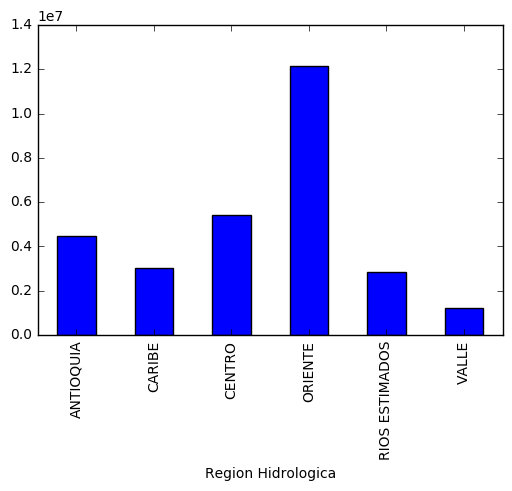

In [36]:
x.groupby('Region Hidrologica').mean()['Aportes Energia kWh'].plot(kind='bar')